In [18]:
# import pandas as pd
# import csv
# df = pd.read_csv('INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2017_A_31-12-2017.csv', sep=';', encoding='iso-8859-1', skiprows=7)

## Pré-processamento

In [59]:
import pandas as pd
import csv
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns

In [20]:
lista_dfs_dec = []
lista_dfs_fec = []
files = glob('indicadores-continuidade-coletivos-*.csv')
for file in files:
    df = pd.read_csv(file, sep=';', encoding='iso-8859-1')
    filtro_dec_sp = (df['SigIndicador'] == 'DEC') & (df['SigAgente'] == 'ELETROPAULO         ')
    filtro_fec_sp = (df['SigIndicador'] == 'FEC') & (df['SigAgente'] == 'ELETROPAULO         ')
    base_dec_sp = df[filtro_dec_sp]
    base_fec_sp = df[filtro_fec_sp]
    lista_dfs_dec.append(base_dec_sp) 
    lista_dfs_fec.append(base_fec_sp) 

df_dec = pd.concat(lista_dfs_dec, ignore_index=True)
df_fec = pd.concat(lista_dfs_fec, ignore_index=True)


In [21]:
for column in df_dec.columns:
    column_new = column.strip()
    df_dec[column] = df_dec[column_new]

for column in df_fec.columns:
    column_new = column.strip()
    df_fec[column] = df_fec[column_new]

In [22]:
df_dec['VlrIndiceEnviado'] = df_dec['VlrIndiceEnviado'].str.replace(',','.')
df_dec['VlrIndiceEnviado'] = df_dec['VlrIndiceEnviado'].astype('float')

df_fec['VlrIndiceEnviado'] = df_fec['VlrIndiceEnviado'].str.replace(',','.')
df_fec['VlrIndiceEnviado'] = df_fec['VlrIndiceEnviado'].astype('float')


In [23]:
df_dec['Data'] = pd.to_datetime(
    df_dec['AnoIndice'].astype(str) + '-' + 
    df_dec['NumPeriodoIndice'].astype(str) + '-01'
)

df_fec['Data'] = pd.to_datetime(
    df_fec['AnoIndice'].astype(str) + '-' + 
    df_fec['NumPeriodoIndice'].astype(str) + '-01'
)


In [24]:
df_dec.head(10)

,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoIndice,NumPeriodoIndice,VlrIndiceEnviado,Data
0,2025-12-05,ELETROPAULO,61695227000193,11111.0,Jandira,DEC,2010,5,0.51,2010-05-01
1,2025-12-05,ELETROPAULO,61695227000193,11111.0,Jandira,DEC,2010,7,0.60,2010-07-01
2,2025-12-05,ELETROPAULO,61695227000193,11111.0,Jandira,DEC,2010,2,1.08,2010-02-01
3,2025-12-05,ELETROPAULO,61695227000193,11113.0,Jardim São Luis,DEC,2010,9,1.78,2010-09-01
4,2025-12-05,ELETROPAULO,61695227000193,11135.0,São Paulo Represa Sul,DEC,2010,7,6.97,2010-07-01
5,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,3,1.22,2010-03-01
6,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,11,0.67,2010-11-01
7,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,1,1.88,2010-01-01
8,2025-12-05,ELETROPAULO,61695227000193,11113.0,Jardim São Luis,DEC,2010,10,1.51,2010-10-01
9,2025-12-05,ELETROPAULO,61695227000193,11115.0,Lapa,DEC,2010,10,0.38,2010-10-01


## Análise exploratória


### DEC


In [68]:
# CRIANDO CAMPOS DE TENDÊNCIA CENTRAL
df_dec_anual = df_dec.groupby(['Data'])['VlrIndiceEnviado'].mean().reset_index()
df_dec_mediana = df_dec.groupby(['Data'])['VlrIndiceEnviado'].median().reset_index()

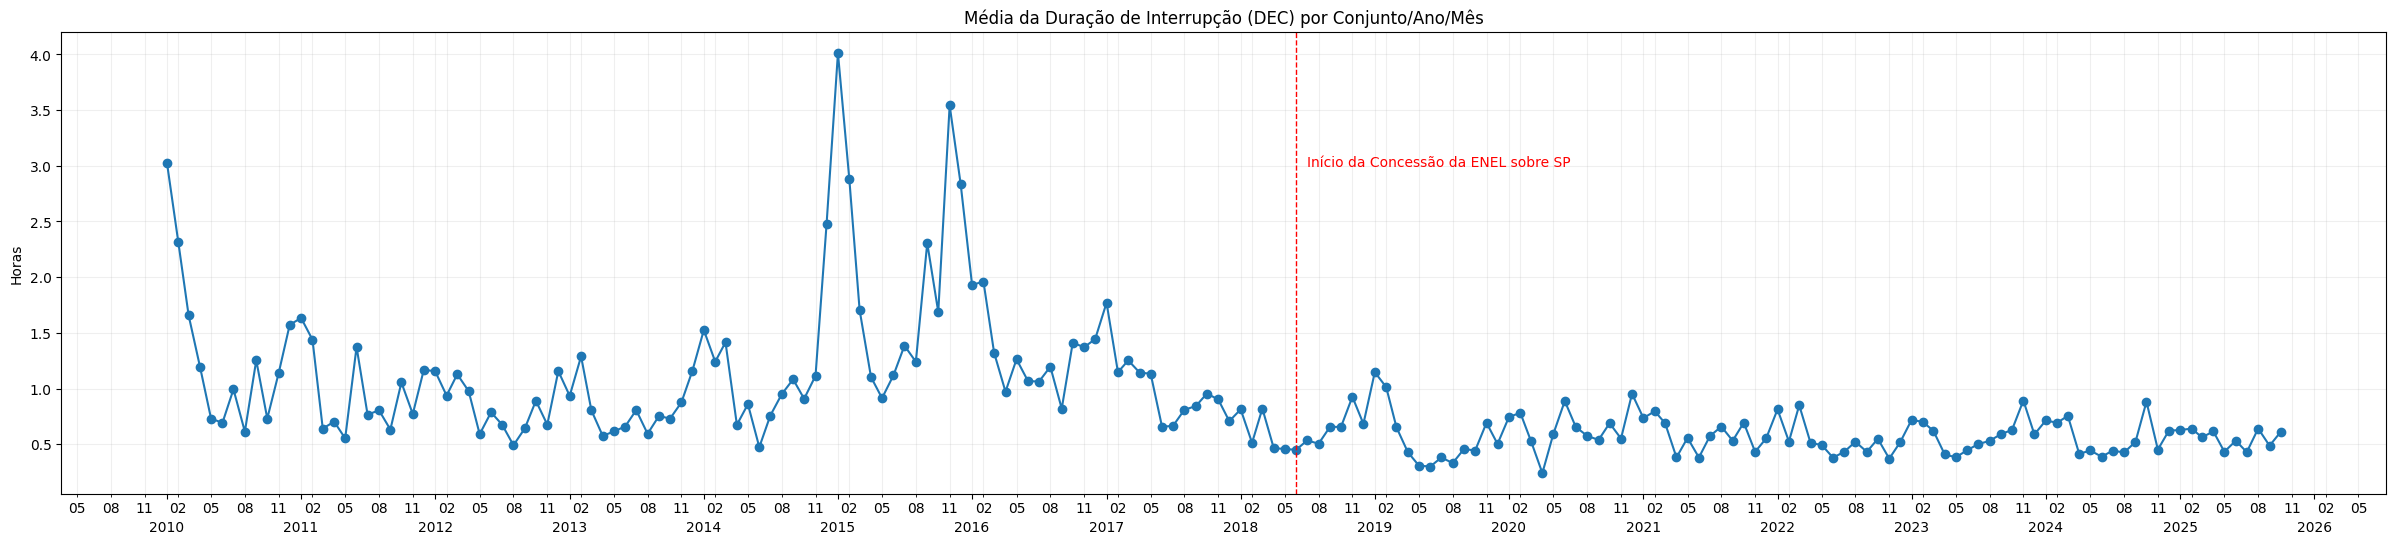

In [98]:
# PLOTANDO GRÁFICO DE LINHA PARA VISUALIZAÇÃO INICIAL
plt.figure(figsize=(30, 6))
plt.plot(df_dec_anual['Data'], df_dec_anual['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')
ax.annotate('Início da Concessão da ENEL sobre SP', color='red', xy=(datetime(2018, 6, 1), 3), xytext=(datetime(2018, 7, 1),3))
plt.title('Média da Duração de Interrupção (DEC) por Conjunto/Ano/Mês')
plt.ylabel('Horas')
plt.grid(True, which='both', alpha=0.2)
plt.show()

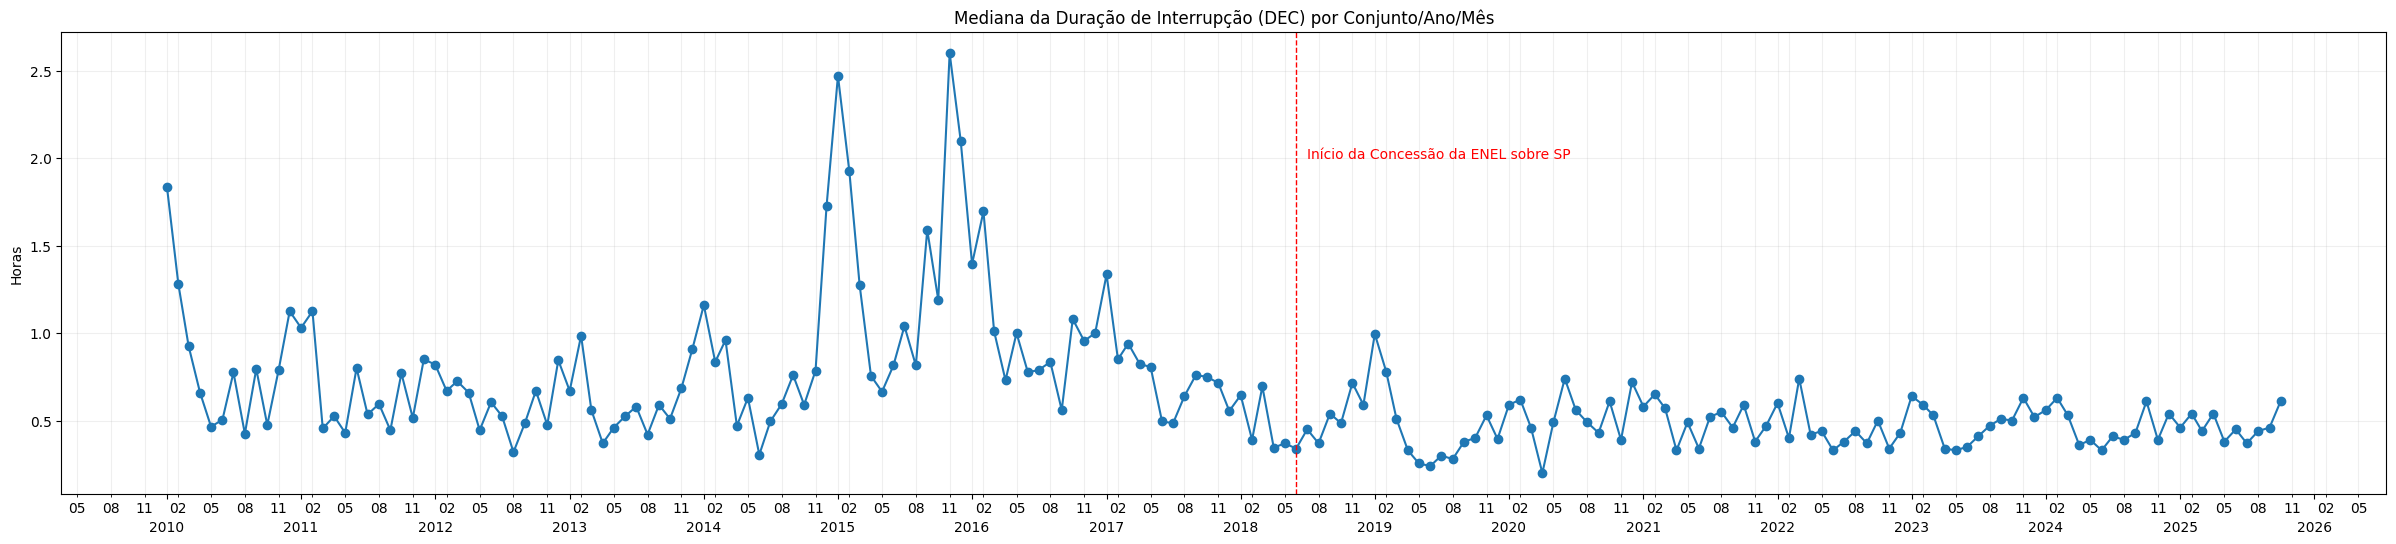

In [102]:
plt.figure(figsize=(30, 6))
plt.plot(df_dec_mediana['Data'], df_dec_mediana['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')
ax.annotate('Início da Concessão da ENEL sobre SP', color='red', xy=(datetime(2018, 6, 1), 2), xytext=(datetime(2018, 7, 1),2))
plt.title('Mediana da Duração de Interrupção (DEC) por Conjunto/Ano/Mês')
plt.ylabel('Horas')
plt.grid(True, which='both', alpha=0.2)
plt.show()

### FEC

In [46]:
df_fec_anual = df_fec.groupby(['Data'])['VlrIndiceEnviado'].mean().reset_index()
df_fec_mediana = df_fec.groupby(['Data'])['VlrIndiceEnviado'].median().reset_index()

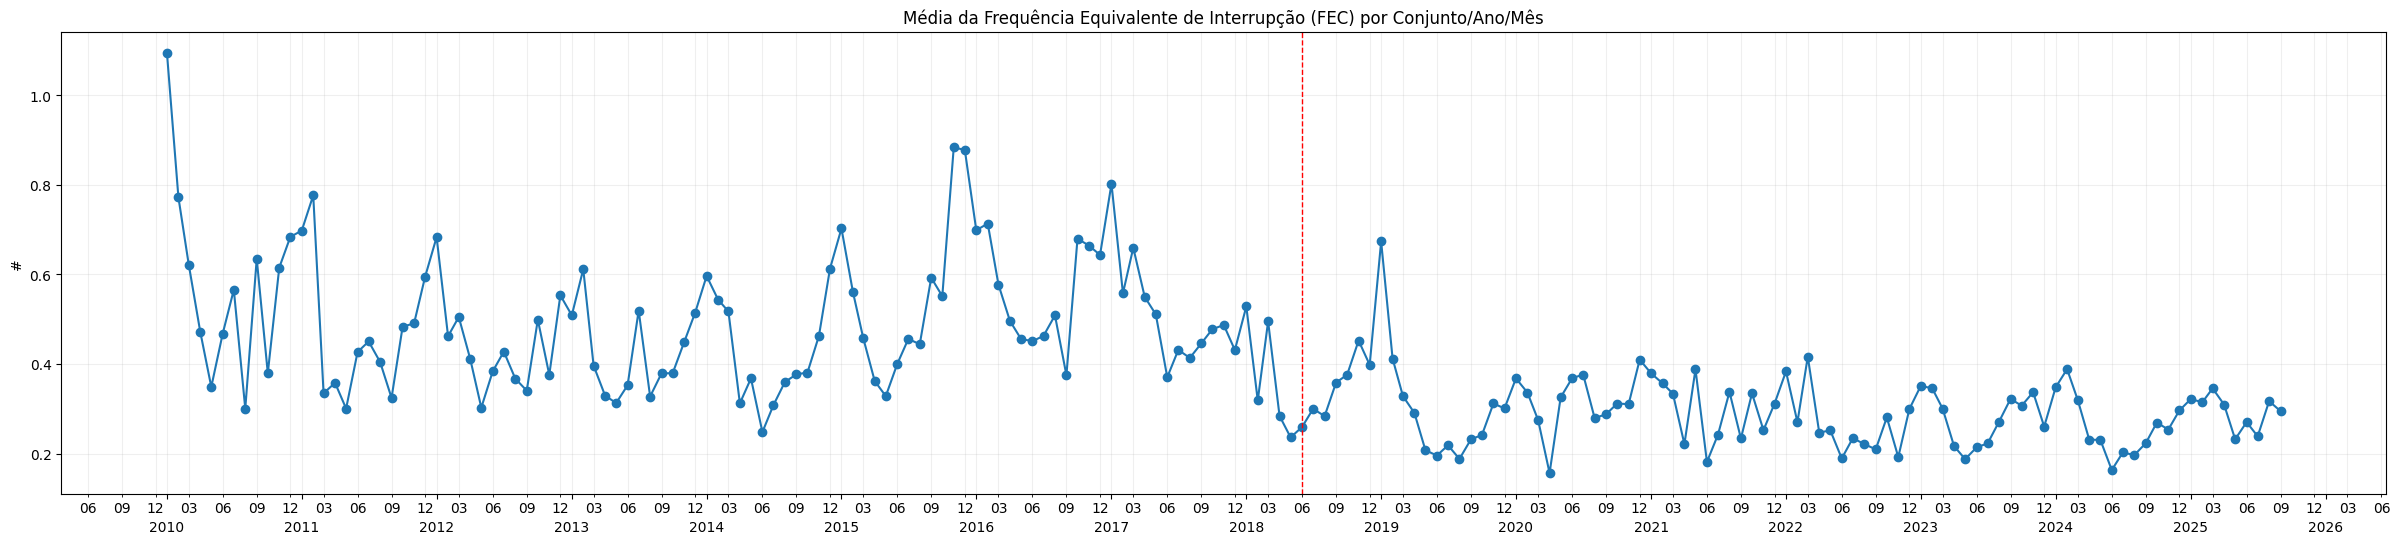

In [65]:
plt.figure(figsize=(30, 6))
plt.plot(df_fec_anual['Data'], df_fec_anual['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')

plt.title('Média da Frequência Equivalente de Interrupção (FEC) por Conjunto/Ano/Mês')
plt.ylabel('#')
plt.grid(True, which='both', alpha=0.2)
plt.show()

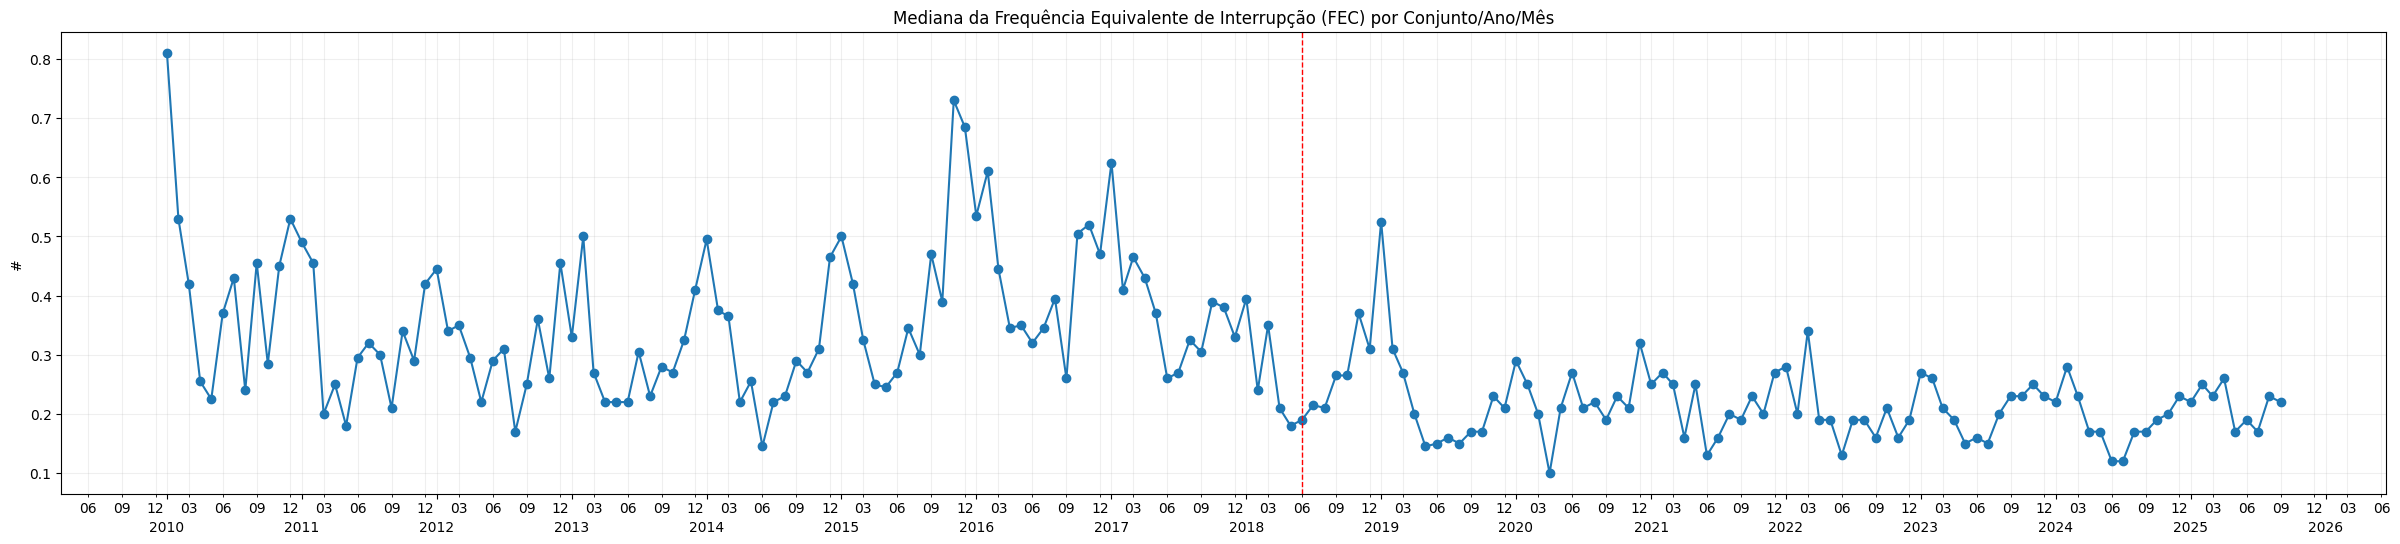

In [66]:
plt.figure(figsize=(30, 6))
plt.plot(df_fec_mediana['Data'], df_fec_mediana['VlrIndiceEnviado'], marker='o')

# 3. Configurar a hierarquia visual no Eixo X
ax = plt.gca()

# Definir os anos como marcadores principais (embaixo)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('\n%Y')) # \n joga o ano para baixo

# Definir os meses como marcadores secundários (em cima)
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
plt.axvline(x=datetime(2018, 6, 1), linewidth=1, color='red', linestyle='--')

plt.title('Mediana da Frequência Equivalente de Interrupção (FEC) por Conjunto/Ano/Mês')
plt.ylabel('#')
plt.grid(True, which='both', alpha=0.2)
plt.show()